In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt



In [4]:
file_path = "C:\\Users\\santhiya99gmail.com\\Downloads\\archive\\housing.csv"
df = pd.read_csv(file_path)

In [5]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Identify target and features
y = df["median_house_value"]
X = df.drop(columns=["median_house_value"])

Epoch 1/20


c:\Users\santhiya99gmail.com\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54974758912.0000 - val_loss: nan
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57519173632.0000 - val_loss: nan
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55867338752.0000 - val_loss: nan
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55490613248.0000 - val_loss: nan
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55794089984.0000 - val_loss: nan
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56110682112.0000 - val_loss: nan
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55251546112.0000 - val_loss: nan
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55328718848.0000 - val_loss: nan
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56179666944.0000 - val_loss: nan
Epoch 10/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55797243904.0000 - val_loss: nan
Epoch 11/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57012613120.0000 - 

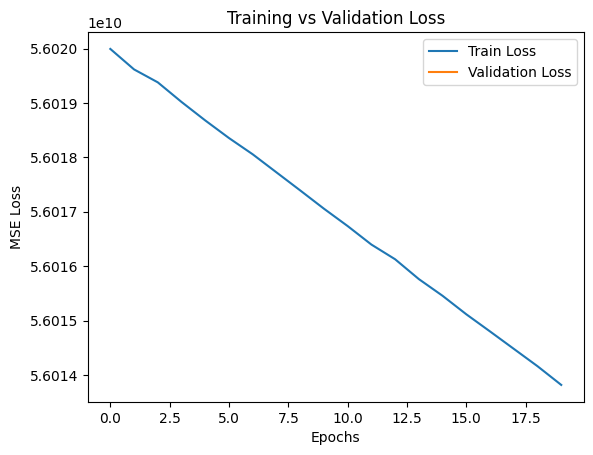

In [9]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.33, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(X_train.shape[1],))
])

model.compile(optimizer='rmsprop', loss='mse')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
